In [2]:
from pylab import*
%matplotlib inline

In [3]:
def RK4(ec, p_ini, x, args=0, h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol

In [4]:
def e_mov(r_v,t,fric=0,g= 9.8,m=1):
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [5]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

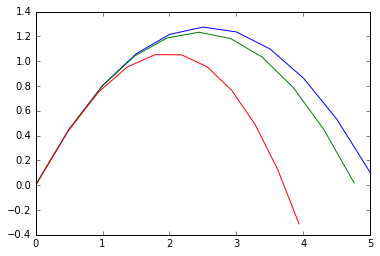

In [6]:
p=[0,0,5,5]
t,sol_id=RK4(e_mov,p,[0,1])
t,sol_fv=RK4(e_mov,p,[0,1],fric_v)
t,sol_fv2=RK4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])

In [7]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)


[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [8]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

IndexError: index 80 is out of bounds for axis 0 with size 11